# First part: ridge regression

In [200]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random
from sklearn.model_selection import train_test_split, cross_val_score
from numpy import linalg

## Ridge regression

Ridge regression is a type of regression that introduces the concept of regularization through the alpha parameter in the ERM; at the end of this project we will see how to calibrate the value of this parameter

A regressor is a function

<img src = "images/regressor.png" width = "200">

 where <em>w</em> is a vector of real coefficients (weights), and <em>x</em> refers to the <em>x</em> component of training set

As anticipated before, the ERM is regularized by parameter <b>alpha</b>

<img src= "images/ridge_regression.png" width = "350"/>

where S is the <b>design matrix</b>, the matrix of examples without labels

$\nabla(\left \| Sw - y \right \|^2 + \alpha \left \| w \right \|^2) = 2(S^TSw - S^Ty) + 2\alpha w$

since we want to minimize this function, let's set it equal to 0 and we obtain

$(S^TS + \alpha I)w = S^Ty$

$w = (S^TS + \alpha I)^{-1} S^Ty$

The regularization is needed since, without it, the vector is unstable; in particular, it can change a lot when the dataset is perturbed and let's keep in mind that we had to deal with missing values, hence we changed a fex examples and this could have led to a variance error.

### Estimator

In [357]:
class myRidgeRegressor(object):
    def __init__(self):
        pass
    
    def fit(self, S, y, alfa):
        self.w = linalg.inv(S.T.dot(S) + alfa * np.eye(S.shape[1])).dot(S.T.dot(y))
    
    def predict(self, x):
        return x.dot(self.w)

In [303]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

In [304]:
def MSE(prediction, y):
    loss = square_loss(prediction, y)
    return 1/len(loss) * sum(loss)

### Loading preprocessed datasets

Let's load the preprocessed datasets, we will handle 4 cases:
1. the complete dataset with replaced missing values normalized with min-max
2. the reduced dataset (missing values have been removed) with min-max normalization
3. the complete dataset with z-score normalization
4. the reduced dataset normalized with z-score

In [420]:
min_max_norm_dataset = pd.read_csv("datasets/min_max_norm_dataset")
min_max_norm_reduced_dataset = pd.read_csv("datasets/min_max_norm_reduced_dataset")

zscore_norm_dataset = pd.read_csv("datasets/zscore_norm_dataset")
zscore_norm_reduced_dataset = pd.read_csv("datasets/zscore_norm_reduced_dataset")

In [421]:
del min_max_norm_dataset["Unnamed: 0"]
del min_max_norm_reduced_dataset["Unnamed: 0"]
del zscore_norm_dataset["Unnamed: 0"]
del zscore_norm_reduced_dataset["Unnamed: 0"]

### Splitting in training and test set

In [422]:
def split_dataset(dataset):
    y = dataset["median_house_value"]
    x = dataset.drop("median_house_value", axis = 1)
    return train_test_split(x, y, test_size = 0.2)

Now we apply the ridge regressor for the 4 datasets and compute predictions, for this part it will be used $\alpha$ = 0.1

In [423]:
ridge_regressor = myRidgeRegressor()

### First dataset

In [424]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_dataset)

We fit the regressor with the training set, we obtain a w vector of weights that depends on alpha parameter

In [354]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.55113547, -0.55418762,  0.12367655, -0.13059539,  0.35174686,
       -0.41366817,  0.22672277,  0.65124576,  0.13130257])

and we can test the regressor on the test set to see how good predictions are done

In [311]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

5818     0.328616
13670    0.151051
1969     0.276477
8072     0.592647
1054     0.269436
2018    -0.006933
11983    0.296646
20168    0.554147
3864     0.378980
9079     0.335344
dtype: float64

In [312]:
loss = square_loss(predictions, y_test)

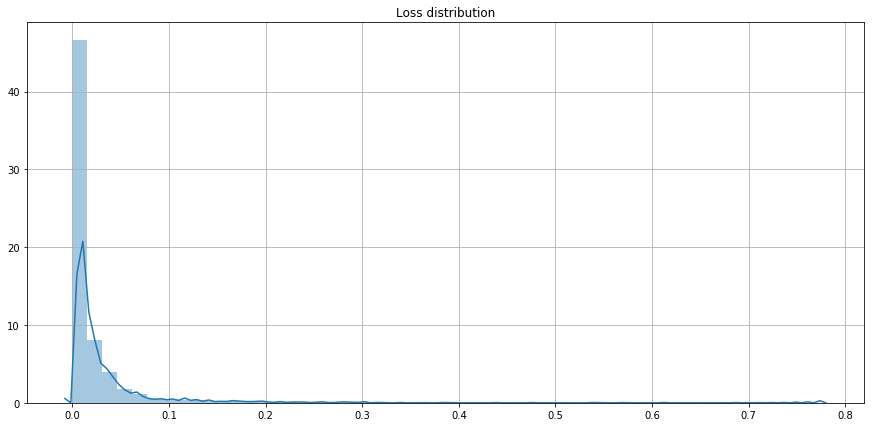

In [313]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

In [314]:
test_error = MSE(predictions, y_test)
test_error

0.01973988869861304

### Second dataset

In [413]:
x_train, x_test, y_train, y_test = split_dataset(min_max_norm_reduced_dataset)

In [414]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.14810506, -0.09108444,  0.17229559, -0.83246141,  1.27945446,
       -2.50438244,  0.92864883,  1.28683839,  0.21594618])

In [317]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

18815    0.189339
10212    0.550819
12354    0.402648
11307    0.364067
2873     0.146527
15513    0.458336
13612    0.286651
3354     0.252518
11245    0.466942
8021     0.578962
dtype: float64

In [318]:
loss = square_loss(predictions, y_test)

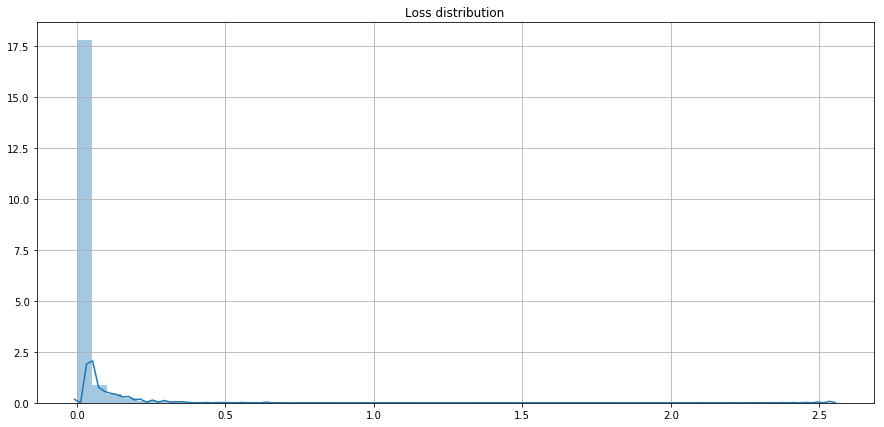

In [319]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

In [320]:
test_error = MSE(predictions, y_test)
test_error

0.021377783271218358

### Third dataset

In [321]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_dataset)

In [322]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.52914316, -0.53342175,  0.13003235, -0.10648083,  0.34199385,
       -0.45384273,  0.2494939 ,  0.65040082,  0.1315496 ])

In [323]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

8634     1.088584
5984     0.422450
7817    -0.014101
14226   -0.174257
13441   -0.237581
3530     0.636462
1224    -0.965384
17241    0.399860
7874     0.209609
20453    0.090949
dtype: float64

In [324]:
loss = square_loss(predictions, y_test)

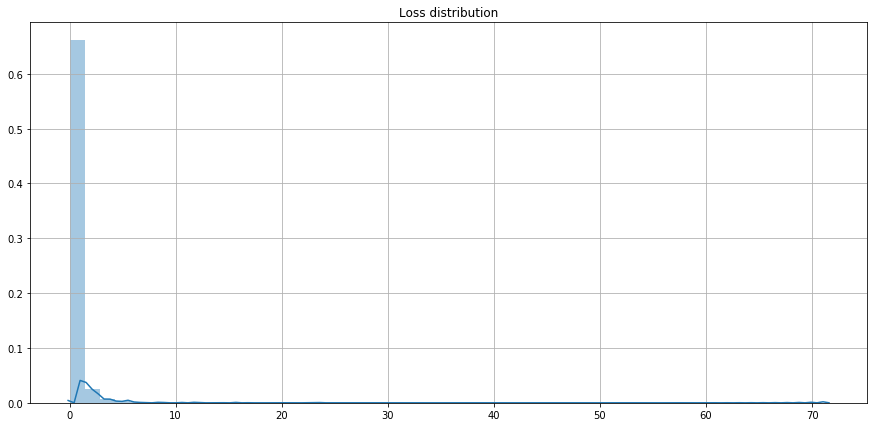

In [325]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

In [326]:
test_error = MSE(predictions, y_test)
test_error

0.3793772181897388

### Fourth dataset

In [327]:
x_train, x_test, y_train, y_test = split_dataset(zscore_norm_reduced_dataset)

In [328]:
ridge_regressor.fit(x_train, y_train, 0.1)
ridge_regressor.w

array([-0.55113547, -0.55418762,  0.12367655, -0.13059539,  0.35174686,
       -0.41366817,  0.22672277,  0.65124576,  0.13130257])

In [329]:
predictions = ridge_regressor.predict(x_test)
predictions[:10]

4112     1.129660
16791    0.792532
12592   -0.153905
13809   -1.181320
5935     1.065704
7212    -0.554009
19369    0.289275
1538     1.124447
14982    0.152888
4052     1.576881
dtype: float64

In [330]:
loss = square_loss(predictions, y_test)

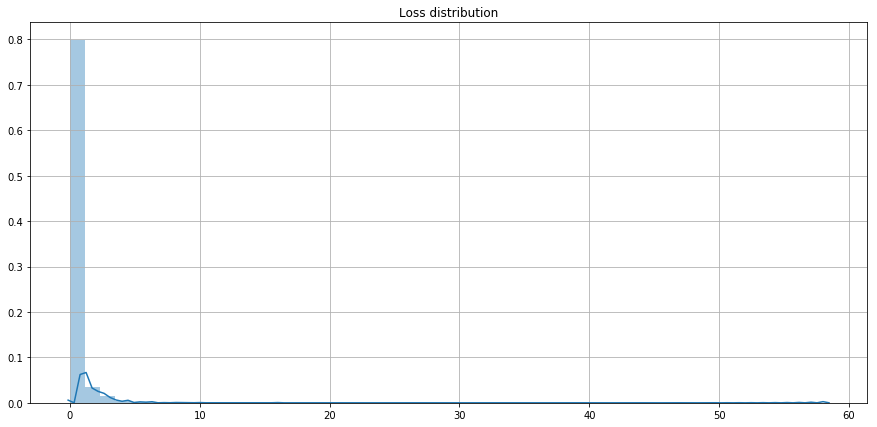

In [331]:
plt.figure(figsize=(15, 7))
plt.title('Loss distribution')
seaborn.distplot(loss.values)
plt.grid()
plt.show()

In [332]:
test_error = MSE(predictions, y_test)
test_error

0.36541784516431375

We notice a relevant difference in test error between the first two datasets with respect to the last twos, which reveals that min max normalization produces better result than z-score.
For what it concerns the replacement of missing values, we notice very little difference.

# Second part: analysis

We are dealing with a learning problem $(D, l)$ where $l$ is the square loss:

- Let $h(S)$ be the prediction of predictor $h$ on training set $S$
- Let $l_D(h(S))$ be the risk of $h(S)$
- Let $E[l_D(h)]$ be the expected risk of $h(S)$ where the expectation is with respect to the random draw of training set $S$

Hence, $E[l_D(h)]$ measures the performance of $h$ on a random training set whereas $l_D(h(S))$ measures the performance of $h$ when the training set is $S$

## K-fold cross validation

We would like to estimate $E[l_D(h)]$ to see, in general, the goodness of our predictor; in order to do this, we can use k-fold cross validation:  
let $S$ be the entire dataset, we partition $S$ in $K$ subsets (called folds) $D_1, D_2, ..., D_K$ of size $m/K$ each where $m$ is the size of $S$ and we use $S^{(k)}$ as <b>training part</b> with $S^{(k)} \equiv S \setminus D_k$ where $D_k$ is the <b>testing part</b>;
we iterate this process for $k = 1 ... K$.

In [333]:
m = len(min_max_norm_reduced_dataset)
K = 5

print(m, K)

20640 5


we choose $K$ such that $m$ is divisible with $K$

In [430]:
def k_fold_split(dataset, m, K):
    partitions = {}
    shift = int(m/K)
    pivot = 0
    for i in range(1, K+1):
        partitions[i] = dataset.iloc[pivot : pivot + shift]
        pivot = pivot + shift
    return partitions

In [446]:
partitions = k_fold_split(min_max_norm_reduced_dataset, m, K)

Now that we have $K$ folds we can proceed by iterating over them choosing the training and the testing part

In order to handle all the possible combinations of training and test set splitting, we convert the vector into a set, such that we can consider all combinations easily

In [448]:
def cross_correlation(partitions, alfa):   
    K = len(partitions)
    vec = []

    for i in range(1, K+1):
        vec.append(i)

    vec_set = set(vec)

    scores = []
    alfa = alfa

    for i in vec:
        # S^(i) means using fold i as testing part and the rest as training

        testing_part = partitions[i]
        vec_set.remove(i)
        training_part = pd.DataFrame()

        for j in vec_set:
            training_part = training_part.append(partitions[j])

        # in this point we compute scores
        y_train = training_part["median_house_value"]
        x_train = training_part.drop("median_house_value", axis = 1)

        y_test = testing_part["median_house_value"]
        x_test = testing_part.drop("median_house_value", axis = 1)

        # learning with training part
        ridge_regressor.fit(x_train, y_train, alfa)

        # testing with testing part
        result = ridge_regressor.predict(x_test)
        scores.append(MSE(result, y_test))

        vec_set.add(i)
    return scores

In [453]:
scores = cross_correlation(partitions, 0.1)
scores

[0.016334408980828476,
 0.024807804268176907,
 0.024831508424911997,
 0.027057542059790624,
 0.01953182731251065]

In [454]:
cv_estimate = np.mean(scores)
cv_estimate

0.022512618209243728

## Dependence of the cross-validated risk estimate on the parameter alpha

## Using PCA

## optional: try nested CV to avoid choosing alpha